# PN2V Training
Here we will use the generated noise model and train a PN2V network on single noisy images.
Please run the 'Convallaria-1-CreateNoiseModel' notebook first.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from unet.model import UNet

from pn2v import utils
from pn2v import histNoiseModel
from pn2v import training
from tifffile import imread
import glob
# See if we can use a GPU
device=utils.getDevice()


CUDA available? True


### Load Data

In [2]:
path="/home/krull/fileserver/N2V-SimSim/data/simsim_for_n2v/matslines3d/camsim/orientations/o0/"
files=iles=glob.glob(path+'*sig200*.tif')

data=[]
for f in files:
    data.append(imread(f).astype(np.float32))
    print('loading',f)

data =np.array(data)
print(data.shape)

loading /home/krull/fileserver/N2V-SimSim/data/simsim_for_n2v/matslines3d/camsim/orientations/o0/190709-141640_ccd_sig200_exp1_rn8_bgrd0_044_0003_o0.tif
loading /home/krull/fileserver/N2V-SimSim/data/simsim_for_n2v/matslines3d/camsim/orientations/o0/190709-221812_ccd_sig200_exp1_rn8_bgrd0_455_0000_o0.tif
loading /home/krull/fileserver/N2V-SimSim/data/simsim_for_n2v/matslines3d/camsim/orientations/o0/190709-124721_ccd_sig200_exp1_rn8_bgrd0_933_0003_o0.tif
loading /home/krull/fileserver/N2V-SimSim/data/simsim_for_n2v/matslines3d/camsim/orientations/o0/190709-194258_ccd_sig200_exp1_rn8_bgrd0_853_0001_o0.tif
loading /home/krull/fileserver/N2V-SimSim/data/simsim_for_n2v/matslines3d/camsim/orientations/o0/190709-221812_ccd_sig200_exp1_rn8_bgrd0_455_0002_o0.tif
loading /home/krull/fileserver/N2V-SimSim/data/simsim_for_n2v/matslines3d/camsim/orientations/o0/190709-124721_ccd_sig200_exp1_rn8_bgrd0_933_0001_o0.tif
loading /home/krull/fileserver/N2V-SimSim/data/simsim_for_n2v/matslines3d/camsim/o

loading /home/krull/fileserver/N2V-SimSim/data/simsim_for_n2v/matslines3d/camsim/orientations/o0/190710-001401_ccd_sig200_exp1_rn8_bgrd0_540_0001_o0.tif
loading /home/krull/fileserver/N2V-SimSim/data/simsim_for_n2v/matslines3d/camsim/orientations/o0/190709-114659_ccd_sig200_exp1_rn8_bgrd0_179_0001_o0.tif
loading /home/krull/fileserver/N2V-SimSim/data/simsim_for_n2v/matslines3d/camsim/orientations/o0/190709-144630_ccd_sig200_exp1_rn8_bgrd0_307_0002_o0.tif
loading /home/krull/fileserver/N2V-SimSim/data/simsim_for_n2v/matslines3d/camsim/orientations/o0/190710-011939_ccd_sig200_exp1_rn8_bgrd0_911_0001_o0.tif
loading /home/krull/fileserver/N2V-SimSim/data/simsim_for_n2v/matslines3d/camsim/orientations/o0/190709-134724_ccd_sig200_exp1_rn8_bgrd0_645_0000_o0.tif
loading /home/krull/fileserver/N2V-SimSim/data/simsim_for_n2v/matslines3d/camsim/orientations/o0/190710-001401_ccd_sig200_exp1_rn8_bgrd0_540_0003_o0.tif
loading /home/krull/fileserver/N2V-SimSim/data/simsim_for_n2v/matslines3d/camsim/o

In [3]:
if len(data.shape)==4:
    data.shape=(data.shape[0]*data.shape[1],data.shape[2],data.shape[3])

print(data.shape)

(8700, 128, 128)


In [4]:
# We are loading the histogram from the 'Convallaria-1-CreateNoiseModel' notebook
histogram=np.load(path+'../../noiseModel.npy')
print (histogram.shape)

# Create a NoiseModel object from the histogram.
noiseModel=histNoiseModel.NoiseModel(histogram, device=device)

(3, 55, 55)


### Create the Network and Train it
This can take a while.

In [5]:
# Create a network with 800 output channels that are interpreted as samples from the prior.
net = UNet(800, depth=3)
import torch

#net=torch.load(path+"/last_conv.net")

# Split training and validation data.
my_train_data=data[:-5].copy()
np.random.shuffle(my_train_data)
my_val_data=data[-5:].copy()
np.random.shuffle(my_val_data)

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix='conv', directory=path, noiseModel=noiseModel,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=5, virtualBatchSize=20, 
                                           batchSize=4, learningRate=1e-3, augment=False)

/home/krull/fileserver/N2V-SimSim/pn2v/unet/model.py:215: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  init.xavier_normal(m.weight)
/home/krull/fileserver/N2V-SimSim/pn2v/unet/model.py:216: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias, 0)


Epoch 0 finished      
avg. loss: 3.119535756111145+-(2SEM)0.03733419339602073      
Epoch 1 finished      
avg. loss: 2.7362576484680177+-(2SEM)0.032304337155801575      
Epoch 2 finished      
avg. loss: 2.5518535494804384+-(2SEM)0.029972189680358054      
Epoch 3 finished      
avg. loss: 2.474596083164215+-(2SEM)0.01886796944388474      
Epoch 4 finished      
avg. loss: 2.395093321800232+-(2SEM)0.0274668469045826      
Epoch 5 finished      
avg. loss: 2.3568453192710876+-(2SEM)0.02081511873403599      
Epoch 6 finished      
avg. loss: 2.30663982629776+-(2SEM)0.021957991921209872      
Epoch 7 finished      
avg. loss: 2.320153093338013+-(2SEM)0.017890723116701857      
Epoch 8 finished      
avg. loss: 2.301373839378357+-(2SEM)0.02033608368120469      
Epoch 9 finished      
avg. loss: 2.288598358631134+-(2SEM)0.01824183995058549      
Epoch 10 finished      
avg. loss: 2.281221854686737+-(2SEM)0.01664189387146446      
Epoch 11 finished      
avg. loss: 2.255037784576416+-(2SEM

Epoch 91 finished      
avg. loss: 2.283300316333771+-(2SEM)0.012961076831745102      
Epoch 92 finished      
avg. loss: 2.259135127067566+-(2SEM)0.014630641143270872      
Epoch 93 finished      
avg. loss: 2.2724122762680055+-(2SEM)0.016454770873559878      
Epoch 94 finished      
avg. loss: 2.2553003668785094+-(2SEM)0.020820785678823422      
Epoch    94: reducing learning rate of group 0 to 1.5625e-05.
Epoch 95 finished      
avg. loss: 2.264955973625183+-(2SEM)0.01388175348934533      
Epoch 96 finished      
avg. loss: 2.255953812599182+-(2SEM)0.01077392200257524      
Epoch 97 finished      
avg. loss: 2.272147023677826+-(2SEM)0.014133208951837752      
Epoch 98 finished      
avg. loss: 2.2640869498252867+-(2SEM)0.014983694892911195      
Epoch 99 finished      
avg. loss: 2.280293893814087+-(2SEM)0.018516979274176927      
Epoch 100 finished      
avg. loss: 2.2659629464149473+-(2SEM)0.012220947876309654      
Epoch 101 finished      
avg. loss: 2.2613659620285036+-(2SEM)0.0

Epoch 179 finished      
avg. loss: 2.271375894546509+-(2SEM)0.011129890405334773      
Epoch 180 finished      
avg. loss: 2.252314567565918+-(2SEM)0.02041890204144624      
Epoch 181 finished      
avg. loss: 2.2655824422836304+-(2SEM)0.010210835065704155      
Epoch 182 finished      
avg. loss: 2.2716945886611937+-(2SEM)0.01812717029798039      
Epoch   182: reducing learning rate of group 0 to 6.1035e-08.
Epoch 183 finished      
avg. loss: 2.261883246898651+-(2SEM)0.019008874009012397      
Epoch 184 finished      
avg. loss: 2.2742878437042235+-(2SEM)0.015509912933018382      
Epoch 185 finished      
avg. loss: 2.274071824550629+-(2SEM)0.0126831291638274      
Epoch 186 finished      
avg. loss: 2.258046770095825+-(2SEM)0.015284011581857783      
Epoch 187 finished      
avg. loss: 2.2664491057395937+-(2SEM)0.014908393876557078      
Epoch 188 finished      
avg. loss: 2.286125433444977+-(2SEM)0.01617051814635501      
Epoch 189 finished      
avg. loss: 2.2638806462287904+-(2S

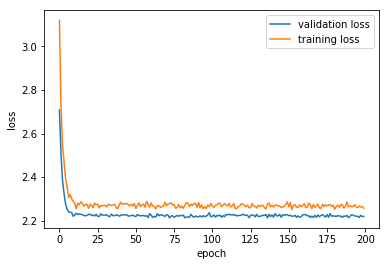

In [6]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()